In [3]:
!pip install "tensorflow>=2.0.0"
!pip install --upgrade tensorflow-hub

     |████████████████████████████████| 107 kB 813 kB/s eta 0:00:01


In [34]:
import tensorflow_hub as hub
import numpy as np
import seaborn as sns
import time
from scripts.vectology_functions import create_pair_distances

In [6]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

(2, (512,))

In [7]:
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

len(embeddings), embeddings[0].numpy().shape

(2, (512,))

In [50]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  #cosine = create_pair_distances(features,features)
  sns.set(font_scale=1.2)
  g = sns.clustermap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  #g.set_xticklabels(labels, rotation=rotation)
  #g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

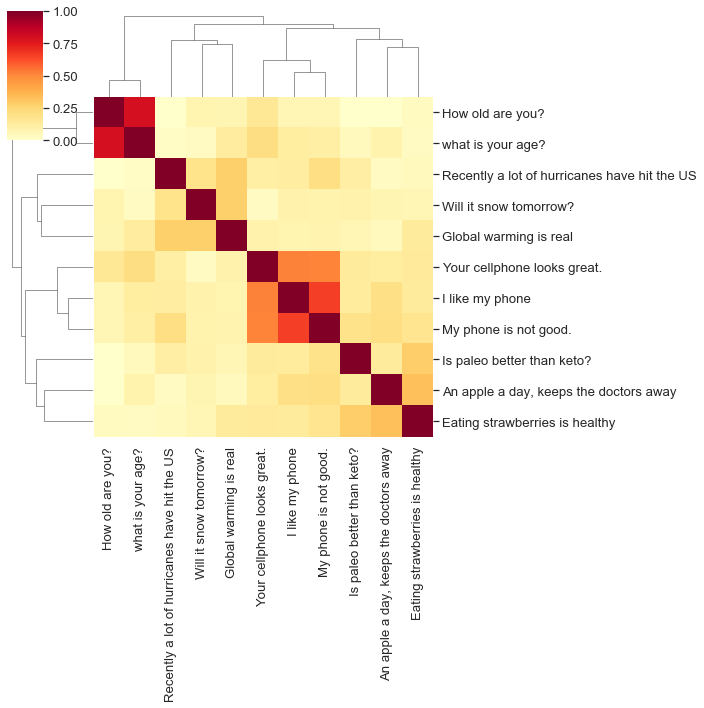

In [51]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

CPU times: user 872 ms, sys: 188 ms, total: 1.06 s
Wall time: 443 ms


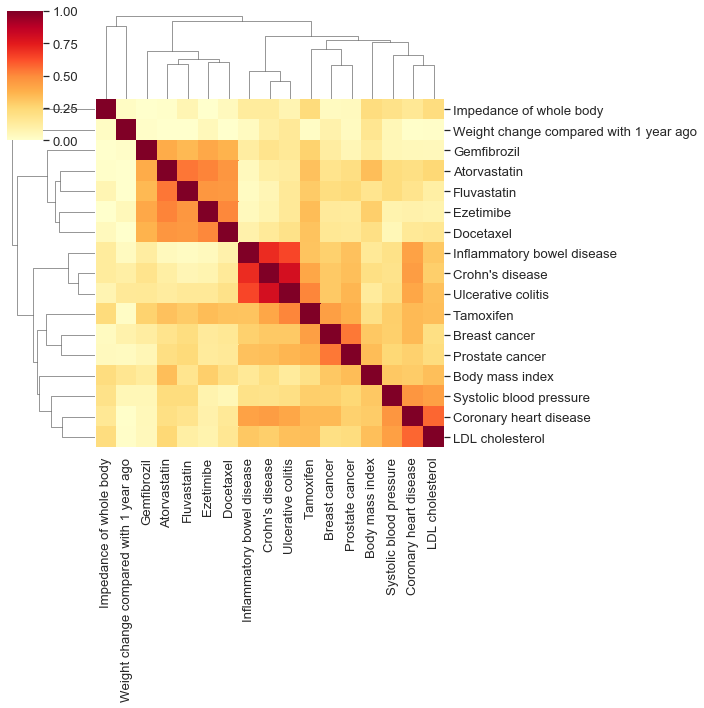

In [52]:
%%time

traits = [
    "Crohn's disease",
    "Breast cancer",
    "Prostate cancer",
    "Systolic blood pressure",
    "Coronary heart disease",
    "Inflammatory bowel disease",
    "Impedance of whole body",
    "Body mass index",
    'Atorvastatin',
    'Fluvastatin',
    'Ezetimibe',
    'Gemfibrozil',
    'Tamoxifen',
    'Docetaxel',
    "Ulcerative colitis",
    'Weight change compared with 1 year ago',
    "LDL cholesterol"
]
run_and_plot(traits)